In [415]:
import pandas as pd
import re
import string
import nltk
import spacy
import numpy as np
import matplotlib.pyplot as plt
from nltk import pos_tag
from nltk.corpus import stopwords
from pywsd.utils import lemmatize_sentence
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from pandas import options

options.display.max_colwidth = 1000

In [416]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.dropna(inplace=True)
df = df[['overview', 'original_title']]

In [417]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation + '’'))
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [token.lower() for token in tokens if token.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

In [418]:
df['overview_cleaned'] = df['overview'].apply(lambda x: clean_text(x))
df['title_cleaned'] = df['original_title'].apply(lambda x: clean_text(x))

In [419]:
df['overview_cleaned_lemmatized'] = df['overview_cleaned'].apply(lambda x: lemmatize_sentence(x))
df['title_cleaned_lemmatized'] = df['title_cleaned'].apply(lambda x: lemmatize_sentence(x))
df['overview_cleaned_lemmatized_pos_tags'] = df['overview_cleaned_lemmatized'].apply(lambda x: pos_tag(x))
df['title_cleaned_lemmatized_pos_tags'] = df['title_cleaned_lemmatized'].apply(lambda x: pos_tag(x))

In [420]:
nlp = spacy.load('en_core_web_lg')

In [421]:
df['title_cleaned_spacy_doc'] = df['title_cleaned'].apply(lambda x: nlp(x))
df['overview_cleaned_spacy_doc'] = df['overview_cleaned'].apply(lambda x: nlp(x))

In [422]:
def get_lemmas(doc):
    return [token.lemma_ for token in doc]

In [423]:
df['title_cleaned_spacy_lemmas'] = df['title_cleaned_spacy_doc'].apply(lambda x: get_lemmas(x))
df['overview_cleaned_spacy_lemmas'] = df['overview_cleaned_spacy_doc'].apply(lambda x: get_lemmas(x))
df['title_cleaned_spacy_lemmas'].apply(lambda x: " ".join(x)).values
df['overview_cleaned_spacy_lemmas'].apply(lambda x: " ".join(x)).values



array(['nd century paraplegic marine dispatch moon pandora unique mission become tear follow order protect alien civilization',
       'captain barbossa long believe dead come back life head edge earth turner elizabeth swann nothing quite seem',
       'cryptic message bond past send trail uncover sinister organization battle political force keep secret service alive bond peel back layer deceit reveal terrible truth behind spectre',
       ...,
       'recently dump girlfirend another man work job hate thing could better peter one night alone apartment knock door life never',
       'friendsfledgle entrepreneur invent device garage reduce apparent mass object place inside accidentally discover highly unexpected capability one could enable seemingly anything want take advantage unique opportunity first challenge face deal consequence next',
       'ambitious new york attorney sam send shanghai assignment immediately stumble legal mess could end career help beautiful relocation specialis

In [424]:
vectorizer = TfidfVectorizer()

In [425]:
X = vectorizer.fit_transform(df['overview_cleaned_lemmatized'].apply(lambda x: " ".join(x)).values)

In [426]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(X)

[]

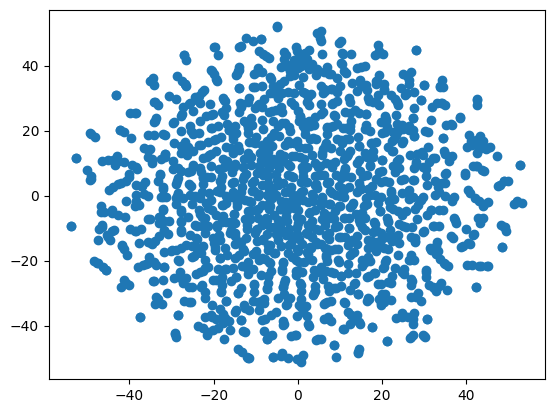

In [427]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.plot()

In [451]:
film_titles = df.original_title.values
overviews = df.overview.values

In [460]:
def find_similar_movies(film_titles,overviews,  X_embedded, movie_emb, n=10):
    cos_sims = np.array([cosine_similarity([movie_emb], [i])[0][0] for i in X_embedded])
    indices_target = [i for i in range(-2, -2 - n, -1)]
    indices_sorted = np.argsort(cos_sims)
    for i in indices_target:
        # print(cos_sims[indices_sorted[i]])
        # print(indices_sorted[i])
        print(film_titles[indices_sorted[i]])
        print("_________")
        print("overview: ", overviews[indices_sorted[i]])


In [458]:
film_titles[3]

'The Dark Knight Rises'

In [461]:
find_similar_movies(film_titles, overviews, X_embedded, X_embedded[3])

Tsotsi
_________
overview:  The South African multi-award winning film about a young South African boy from the ghetto named Tsotsi, meaning Gangster. Tsotsi, who left home as a child to get away from helpless parents, finds a baby in the back seat of a car that he has just stolen. He decides that it his responsibility to take care of the baby and in the process learns that maybe the gangster life isn’t the best way.
Takers
_________
overview:  A seasoned team of bank robbers, including Gordon Jennings (Idris Elba), John Rahway (Paul Walker), A.J. (Hayden Christensen), and brothers Jake (Michael Ealy) and Jesse Attica (Chris Brown) successfully complete their latest heist and lead a life of luxury while planning their next job. When Ghost (Tip T.I. Harris), a former member of their team, is released from prison he convinces the group to strike an armored car carrying $20 million. As the "Takers" carefully plot out their strategy and draw nearer to exacting the grand heist, a reckless p

In [431]:
new_movie_overview = 'Two friends are searching for their long lost companion. They revisit their college days and recall the memories of their friend who inspired them to think differently, even as the rest of the world called them "idiots".'
new_movie_overview_ = lemmatize_sentence(clean_text(new_movie_overview))

In [432]:
df = df.append({'overview_cleaned_lemmatized': new_movie_overview_, 'original_title': "3 Idiots"}, ignore_index=True)
film_titles_ = df.original_title.values

/var/folders/vn/wf1rpzp51jj_bp2lz71rs3q80000gn/T/ipykernel_18272/1157441372.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'overview_cleaned_lemmatized': new_movie_overview_, 'original_title': "3 Idiots"}, ignore_index=True)


In [433]:
X_ = vectorizer.fit_transform(df['overview_cleaned_lemmatized'].apply(lambda x: " ".join(x)).values)
X_embedded_ = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(X_)

In [449]:
find_similar_movies(film_titles_, X_embedded_, X_embedded_[3])

Nine
The Dark Knight
Love the Coopers
Nacho Libre
Spotlight
Perfume: The Story of a Murderer
The Boondock Saints
The Boondock Saints II: All Saints Day
Black Nativity
Katy Perry: Part of Me
